In [54]:
#1. Import the necessary libraries.

In [55]:
import pandas as pd
import numpy as np
import snakecase
import stringcase
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")


In [56]:
#2. Load the we_fn_use_c_marketing_customer_value_analysis.csv into the variable customer_df

In [57]:
customer_df = pd.read_csv('we_fn_use_c_marketing_customer_value_analysis.csv')


In [58]:
#3. First look at its main features (head, shape, info).

In [59]:
customer_df.head()



,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,Income,...,Months Since Policy Inception,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size
0,BU79786,Washington,2763.519279,No,Basic,Bachelor,2/24/11,Employed,F,56274,...,5,0,1,Corporate Auto,Corporate L3,Offer1,Agent,384.811147,Two-Door Car,Medsize
1,QZ44356,Arizona,6979.535903,No,Extended,Bachelor,1/31/11,Unemployed,F,0,...,42,0,8,Personal Auto,Personal L3,Offer3,Agent,1131.464935,Four-Door Car,Medsize
2,AI49188,Nevada,12887.431650,No,Premium,Bachelor,2/19/11,Employed,F,48767,...,38,0,2,Personal Auto,Personal L3,Offer1,Agent,566.472247,Two-Door Car,Medsize
3,WW63253,California,7645.861827,No,Basic,Bachelor,1/20/11,Unemployed,M,0,...,65,0,7,Corporate Auto,Corporate L2,Offer1,Call Center,529.881344,SUV,Medsize
4,HB64268,Washington,2813.692575,No,Basic,Bachelor,2/3/11,Employed,M,43836,...,44,0,1,Personal Auto,Personal L1,Offer1,Agent,138.130879,Four-Door Car,Medsize


In [60]:
customer_df.shape

(9134, 24)

In [61]:
customer_df.dtypes

Customer                          object
State                             object
Customer Lifetime Value          float64
Response                          object
Coverage                          object
Education                         object
Effective To Date                 object
EmploymentStatus                  object
Gender                            object
Income                             int64
Location Code                     object
Marital Status                    object
Monthly Premium Auto               int64
Months Since Last Claim            int64
Months Since Policy Inception      int64
Number of Open Complaints          int64
Number of Policies                 int64
Policy Type                       object
Policy                            object
Renew Offer Type                  object
Sales Channel                     object
Total Claim Amount               float64
Vehicle Class                     object
Vehicle Size                      object
dtype: object

In [62]:
customer_df.columns = customer_df.columns.str.replace(' ', '_').map(stringcase.snakecase)


In [63]:
#Rename the columns so they follow the PE8 (snake case) (lower_case_with_underscores)

In [64]:
customer_df.columns = customer_df.columns.str.replace(' ', '_').map(stringcase.snakecase)


In [65]:
#5. Change effective to date column to datetime format.

In [66]:
customer_df['effective__to__date'] = pd.to_datetime(customer_df['effective__to__date'],errors='coerce')


In [67]:
#6. Create a new dataframe using only the numerical data called numerical_df. Use this for the following questions.


In [68]:
numerical_df = customer_df._get_numeric_data()
numerical_df

,customer__lifetime__value,income,monthly__premium__auto,months__since__last__claim,months__since__policy__inception,number_of__open__complaints,number_of__policies,total__claim__amount
0,2763.519279,56274,69,32,5,0,1,384.811147
1,6979.535903,0,94,13,42,0,8,1131.464935
2,12887.431650,48767,108,18,38,0,2,566.472247
3,7645.861827,0,106,18,65,0,7,529.881344
4,2813.692575,43836,73,12,44,0,1,138.130879
...,...,...,...,...,...,...,...,...
9129,23405.987980,71941,73,18,89,0,2,198.234764
9130,3096.511217,21604,79,14,28,0,1,379.200000
9131,8163.890428,0,85,9,37,3,2,790.784983
9132,7524.442436,21941,96,34,3,0,3,691.200000


In [69]:
#7. Define a function that differentiates between continuous and discrete variables. Hint: The number of unique values might be useful.
#Store continuous data into a continuous_df variable and do the same for discrete_df

In [70]:
def differentiate_variables(df):
    continuous_cols = []
    discrete_cols = []

    for col in numerical_df.columns:
        if numerical_df[col].nunique() <= 20:
            discrete_cols.append(col)
        else:
            continuous_cols.append(col)

    continuous_df = df[continuous_cols]
    discrete_df = df[discrete_cols]

    return continuous_df, discrete_df
continuous_df, discrete_df = differentiate_variables(numerical_df)

In [71]:
#8. Plot a correlation matrix, comment what you see.

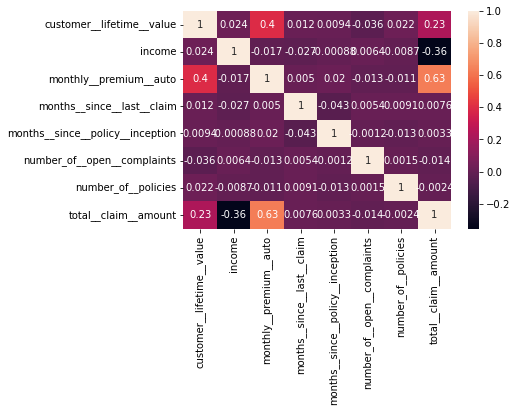

In [72]:
corr_matrix = numerical_df.corr()
sns.heatmap(corr_matrix, annot=True)
plt.show()

In [73]:
#9. Create a function to plot every discrete variable. Do the same with the continuous variables
#(Be Careful, you may need to change the plot type to one better suited for continuous data!)

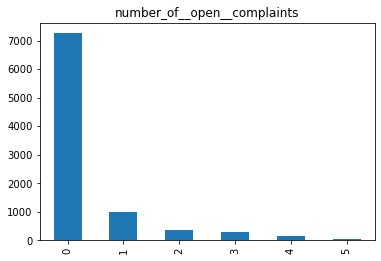

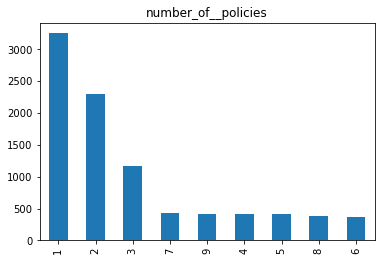

In [74]:
def plot_discrete_variables(df):
    for var in discrete_df:
        plt.figure()
        discrete_df[var].value_counts().plot(kind='bar')
        plt.title(var)
        plt.show()
plot_discrete_variables(discrete_df)

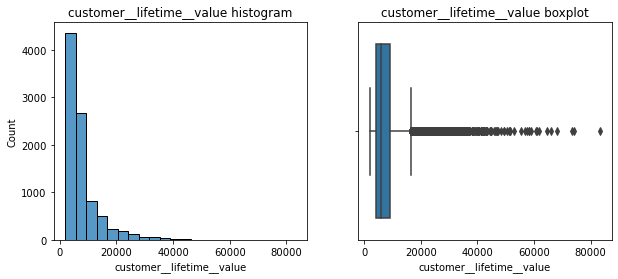

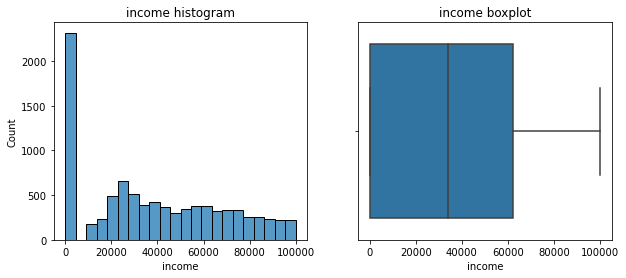

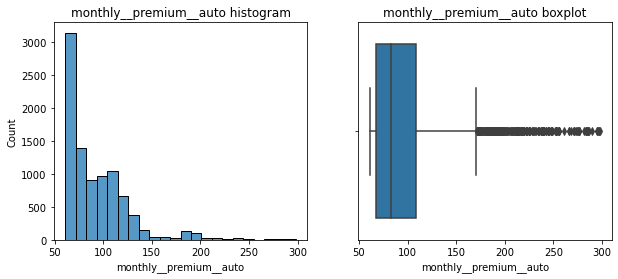

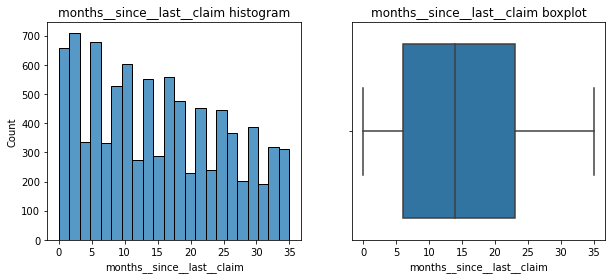

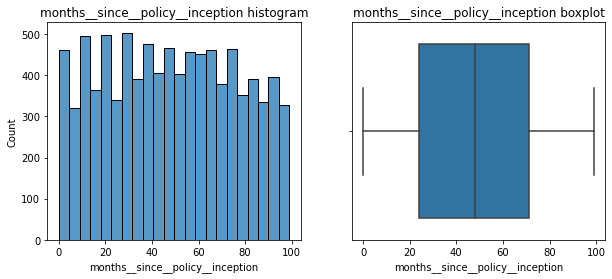

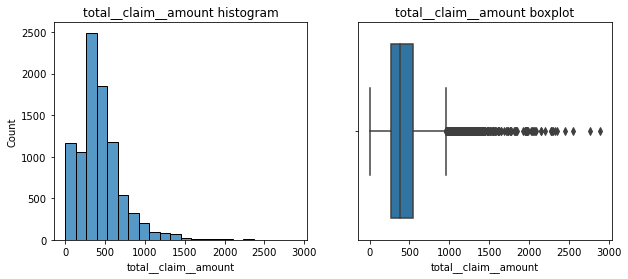

In [75]:
def plot_continuous_variables(df):
    for var in continuous_df:
            fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(10, 4))
            sns.histplot(df[var], bins=22, ax=ax1)
            ax1.set_title(f"{var} histogram")
            sns.boxplot(df[var], ax=ax2)
            ax2.set_title(f"{var} boxplot")
            plt.show()
plot_continuous_variables(continuous_df)

In [76]:
#10. Comment what you can see in the plots.

the plots show that at least 3 plots have to many outliers

SyntaxError: invalid syntax (963176151.py, line 3)

In [ ]:
#11. Look for outliers in the continuous variables. (HINT: There’s a good plot to do that!)

to look for the outliers i used the box plot within seaborn library

In [ ]:
#12. Did you find outliers? Comment what you will do with them. If you decide to remove them, do that now.
i'll do nothing with them. i could drop them but then i'll lose a lot of data

In [ ]:
#13. Check all columns for NaN values. Decide what (if anything) you will need to do with them, do that now.
(customer_df.isna().sum()/len(customer_df)).sort_values(ascending=False)


customer                            0.0
state                               0.0
vehicle__class                      0.0
total__claim__amount                0.0
sales__channel                      0.0
renew__offer__type                  0.0
policy                              0.0
policy__type                        0.0
number_of__policies                 0.0
number_of__open__complaints         0.0
months__since__policy__inception    0.0
months__since__last__claim          0.0
monthly__premium__auto              0.0
marital__status                     0.0
location__code                      0.0
income                              0.0
gender                              0.0
employment_status                   0.0
effective__to__date                 0.0
education                           0.0
coverage                            0.0
response                            0.0
customer__lifetime__value           0.0
vehicle__size                       0.0
dtype: float64

In [ ]:
#14. Save the numerical_df to csv as numerical.csv You will use this file again this week.


In [ ]:
numerical_df.to_csv('numerical.csv')